In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.time import Time

In [2]:
#This should be the correct number of photons on the disc. This takes into account quantum effects too:
def N_final():
    sigma = np.sqrt((-1*25)/(2*np.log(0.5)))
    N_final = 5000*2*(np.pi)*(sigma)**2 #5000 photons are needed to take quantum effects into account
    return N_final
print(N_final())

566545.0177283993


In [3]:
#Making a pandas dataframe with a list of magnitudes
mag = np.linspace(-30, 30)
band_ = pd.DataFrame(mag, columns = ['m'])
band_ = band_[23:39]
band_

,m
23,-1.836735
24,-0.612245
25,0.612245
26,1.836735
27,3.061224
28,4.285714
29,5.510204
30,6.734694
31,7.959184
32,9.183673


In [4]:
#Calculating time exposure for red filter
band_['m'] = band_['m'].astype(float)
m = band_['m']
def tex_R(m):
    a = N_final()
    b = (1.51) * 10**(7)
    c = 3080
    d = 10**(((-1)*band_['m'])/2.5)
    e = ((math.pi)*(0.2/2)**2) - ((math.pi)*(0.1/2)**2) #New collecting area of telescope = area of aperture - area of small disc mirror in centre
    f = 0.23
    tex_R = a/(b*c*d*e*f) #The time exposure is multiplied by No. Pixels to ensure each pixel collects 5000 photons
    return tex_R
print(tex_R(m))
band_['tex_R'] = tex_R (m)
band_    

23       0.000414
24       0.001279
25       0.003951
26       0.012203
27       0.037693
28       0.116427
29       0.359625
30       1.110824
31       3.431162
32      10.598324
33      32.736564
34     101.118126
35     312.338077
36     964.763468
37    2980.003460
38    9204.764605
Name: m, dtype: float64


,m,tex_R
23,-1.836735,0.000414
24,-0.612245,0.001279
25,0.612245,0.003951
26,1.836735,0.012203
27,3.061224,0.037693
28,4.285714,0.116427
29,5.510204,0.359625
30,6.734694,1.110824
31,7.959184,3.431162
32,9.183673,10.598324


In [5]:
#Calculates time exposure for green filter
band_['m'] = band_['m'].astype(float)
m = band_['m']
def tex_G(m):
    a = N_final()
    b = (1.51) * 10**(7)
    c = 3730
    d = 10**(((-1)*band_['m'])/2.5)
    e = ((math.pi)*(0.2/2)**2) - ((math.pi)*(0.1/2)**2)
    f = 0.14
    tex_G = a/(b*c*d*e*f)
    return tex_G
print(tex_G(m))
band_['tex_G'] = tex_G(m)
band_    

23        0.000562
24        0.001735
25        0.005359
26        0.016554
27        0.051133
28        0.157941
29        0.487855
30        1.506909
31        4.654606
32       14.377351
33       44.409387
34      137.173651
35      423.707954
36     1308.767600
37     4042.578421
38    12486.892468
Name: m, dtype: float64


,m,tex_R,tex_G
23,-1.836735,0.000414,0.000562
24,-0.612245,0.001279,0.001735
25,0.612245,0.003951,0.005359
26,1.836735,0.012203,0.016554
27,3.061224,0.037693,0.051133
28,4.285714,0.116427,0.157941
29,5.510204,0.359625,0.487855
30,6.734694,1.110824,1.506909
31,7.959184,3.431162,4.654606
32,9.183673,10.598324,14.377351


In [6]:
#Calculates time exposure for Blue filter
band_['m'] = band_['m'].astype(float)
m = band_['m']
def tex_B(m):
    a = N_final()
    b = (1.51) * 10**(7)
    c = 4260
    d = 10**(((-1)*m)/2.5)
    e = ((math.pi)*(0.2/2)**2) - ((math.pi)*(0.1/2)**2)
    f = 0.22
    m = band_['m']
    tex_B = a/(b*c*d*e*f)
    return tex_B
print(tex_B(m))
band_['tex_B'] = tex_B(m)
band_    

23       0.000313
24       0.000967
25       0.002986
26       0.009224
27       0.028491
28       0.088003
29       0.271829
30       0.839637
31       2.593508
32       8.010939
33      24.744539
34      76.432011
35     236.086527
36     729.234358
37    2252.490878
38    6957.592026
Name: m, dtype: float64


,m,tex_R,tex_G,tex_B
23,-1.836735,0.000414,0.000562,0.000313
24,-0.612245,0.001279,0.001735,0.000967
25,0.612245,0.003951,0.005359,0.002986
26,1.836735,0.012203,0.016554,0.009224
27,3.061224,0.037693,0.051133,0.028491
28,4.285714,0.116427,0.157941,0.088003
29,5.510204,0.359625,0.487855,0.271829
30,6.734694,1.110824,1.506909,0.839637
31,7.959184,3.431162,4.654606,2.593508
32,9.183673,10.598324,14.377351,8.010939


In [7]:
#Texp for luminance
band_['m'] = band_['m'].astype(float)
m = band_['m']
def tex_L(m):
    a = N_final()
    b = (1.51) * 10**(7)
    c = 3690
    d = 10**(((-1)*m)/2.5)
    e = ((math.pi)*(0.2/2)**2) - ((math.pi)*(0.1/2)**2)
    f = 0.55
    m = band_['m']
    tex_L = a/(b*c*d*e*f)
    return tex_L
print(tex_L(m))
band_['tex_L'] = tex_L(m)
band_   

23       0.000145
24       0.000446
25       0.001379
26       0.004259
27       0.013157
28       0.040639
29       0.125528
30       0.387735
31       1.197652
32       3.699361
33      11.426746
34      35.295433
35     109.022071
36     336.752126
37    1040.174650
38    3212.936805
Name: m, dtype: float64


,m,tex_R,tex_G,tex_B,tex_L
23,-1.836735,0.000414,0.000562,0.000313,0.000145
24,-0.612245,0.001279,0.001735,0.000967,0.000446
25,0.612245,0.003951,0.005359,0.002986,0.001379
26,1.836735,0.012203,0.016554,0.009224,0.004259
27,3.061224,0.037693,0.051133,0.028491,0.013157
28,4.285714,0.116427,0.157941,0.088003,0.040639
29,5.510204,0.359625,0.487855,0.271829,0.125528
30,6.734694,1.110824,1.506909,0.839637,0.387735
31,7.959184,3.431162,4.654606,2.593508,1.197652
32,9.183673,10.598324,14.377351,8.010939,3.699361


C:\Users\micha\AppData\Local\Temp/ipykernel_11148/3973542762.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(band_['m'], band_['tex_R'], '.b-', color = 'red', markersize = 1, label = 'R')
C:\Users\micha\AppData\Local\Temp/ipykernel_11148/3973542762.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(band_['m'], band_['tex_G'], '.b-', color = 'green', markersize = 1, label = 'G')
C:\Users\micha\AppData\Local\Temp/ipykernel_11148/3973542762.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(band_['m'], band_['tex_B'], '.b-', color = 'blue', markersize = 1, label = 'B')
C:\Users\micha\AppData\Local\Temp/ipykernel_11148/39

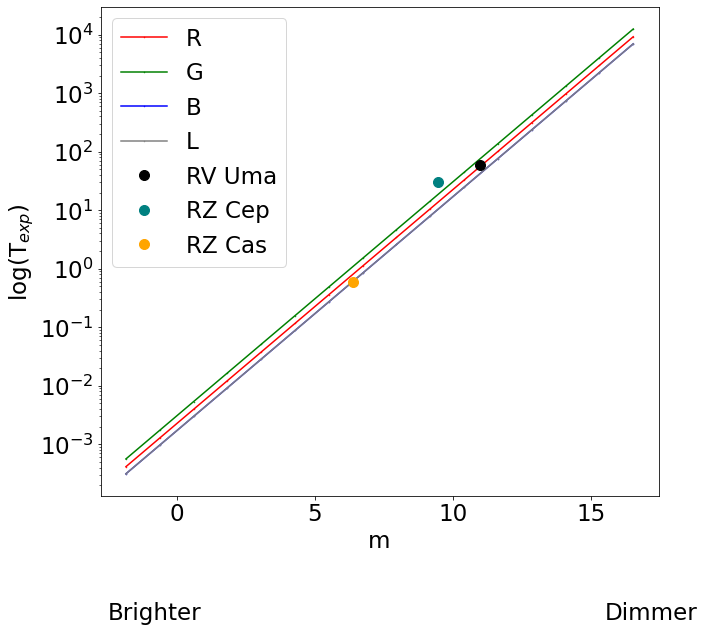

In [9]:
#Plots the time exposure (on a log scale) against the magnitude for each filter 
band_['tex_R'] = band_['tex_R'].astype(float)
band_['tex_G'] = band_['tex_G'].astype(float)
band_['tex_B'] = band_['tex_B'].astype(float)
band_['tex_L'] = band_['tex_B'].astype(float)
band_['m'] = band_['m'].astype(float)

fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(1,1,1)
ax.plot(band_['m'], band_['tex_R'], '.b-', color = 'red', markersize = 1, label = 'R')
ax.plot(band_['m'], band_['tex_G'], '.b-', color = 'green', markersize = 1, label = 'G')
ax.plot(band_['m'], band_['tex_B'], '.b-', color = 'blue', markersize = 1, label = 'B')
ax.plot(band_['m'], band_['tex_L'], '.b-', color = 'grey', markersize = 1, label = 'L')
ax.set_xlabel('m', fontsize = 23)
ax.set_ylabel('log(T$_{exp}$)', fontsize = 23)
plt.rcParams.update({'font.size':23})
plt.text(-2.5, 0.000001, 'Brighter', fontsize = 23)
plt.text(15.5, 0.000001, 'Dimmer', fontsize = 23)
ax.plot([10.97],[60], marker = '.', color = 'black',  ls='none', ms=20, label = 'RV Uma')
ax.plot([9.48],[30],marker = '.', color = 'teal',  ls='none', ms=20, label = 'RZ Cep')
ax.plot([6.4],[0.6],marker = '.', color = 'orange',  ls='none', ms=20, label = 'RZ Cas')
ax.set_yscale('log')

ax.legend()

plt.savefig("t_exp_graph.pdf", dpi = 1500)
plt.show()

In [11]:
#This just compares theory with experimental times used previously
#Calculates time exposures for each star in the B filter
#Note the true exposure times used were:
#Uma = 60s, Cep = 30s, Cas = 0.6s
Uma = tex_B(10.97)
Cep = tex_B(9.48)
Cas = tex_B(6.4)
print(Uma)
print(Cep)
print(Cas)

41.51586216054976
10.524805078301451
0.6168989930463538
